In [17]:
import csv

import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import csv
from scipy.stats import norm

def channel_to_energy(channel, slope, intercept):
    # Convert channel number to energy using calibration constants
    return slope * channel + intercept

def convert_spe_to_csv(spe_file_path, slope, y_intercept):
    # Initialize lists to hold the data
    indices = []
    counts = []
    
    # Read the .Spe file content
    with open(spe_file_path, 'r') as file:
        content = file.readlines()
    
    # Flags to identify when the data section starts and when actual data starts
    data_section = False
    data_started = False
    
    for line in content:
        if line.startswith('$ROI:'):
            break  # Stop reading if we reach the $ROI: section
        if data_section and data_started:
            counts.append(int(line.strip()))  # Append count after stripping whitespace
            indices.append(len(counts))  # The index is simply the count of how many data points have been read
        if line.startswith('$DATA:'):
            data_section = True  # Set the flag to True, next lines will be data
        elif data_section and not data_started:
            data_started = True  # Skip the first line after $DATA:
    
    # Calculate the energy for each channel
    energies = [channel_to_energy(channel, slope, y_intercept) for channel in indices]
    
    # Define the CSV file path based on the .Spe file path
    csv_file_path = spe_file_path.replace('.Spe', '_with_energy.csv')
    
    # Writing the data along with the calculated energies to the CSV file
    with open(csv_file_path, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Time', 'Count', 'Energy (keV)'])  # Writing the header
        writer.writerows(zip(indices, counts, energies))  # Writing the actual data
    
    return csv_file_path

# Replace with your .Spe file path
your_spe_file_path = './02-06-2024_Na22_measurement_01.Spe'

# Calibration constants obtained previously
slope = 0.3014996053670087
y_intercept = -1109.560378847672

# Calling the function to convert .Spe to CSV
csv_file = convert_spe_to_csv(your_spe_file_path, slope, y_intercept)
print(f"CSV file created at: {csv_file}")


CSV file created at: ./02-06-2024_Na22_measurement_01_with_energy.csv


In [18]:
data = pd.read_csv("./02-06-2024_Na22_measurement_01_with_energy.csv")


Text(0, 0.5, 'Density')

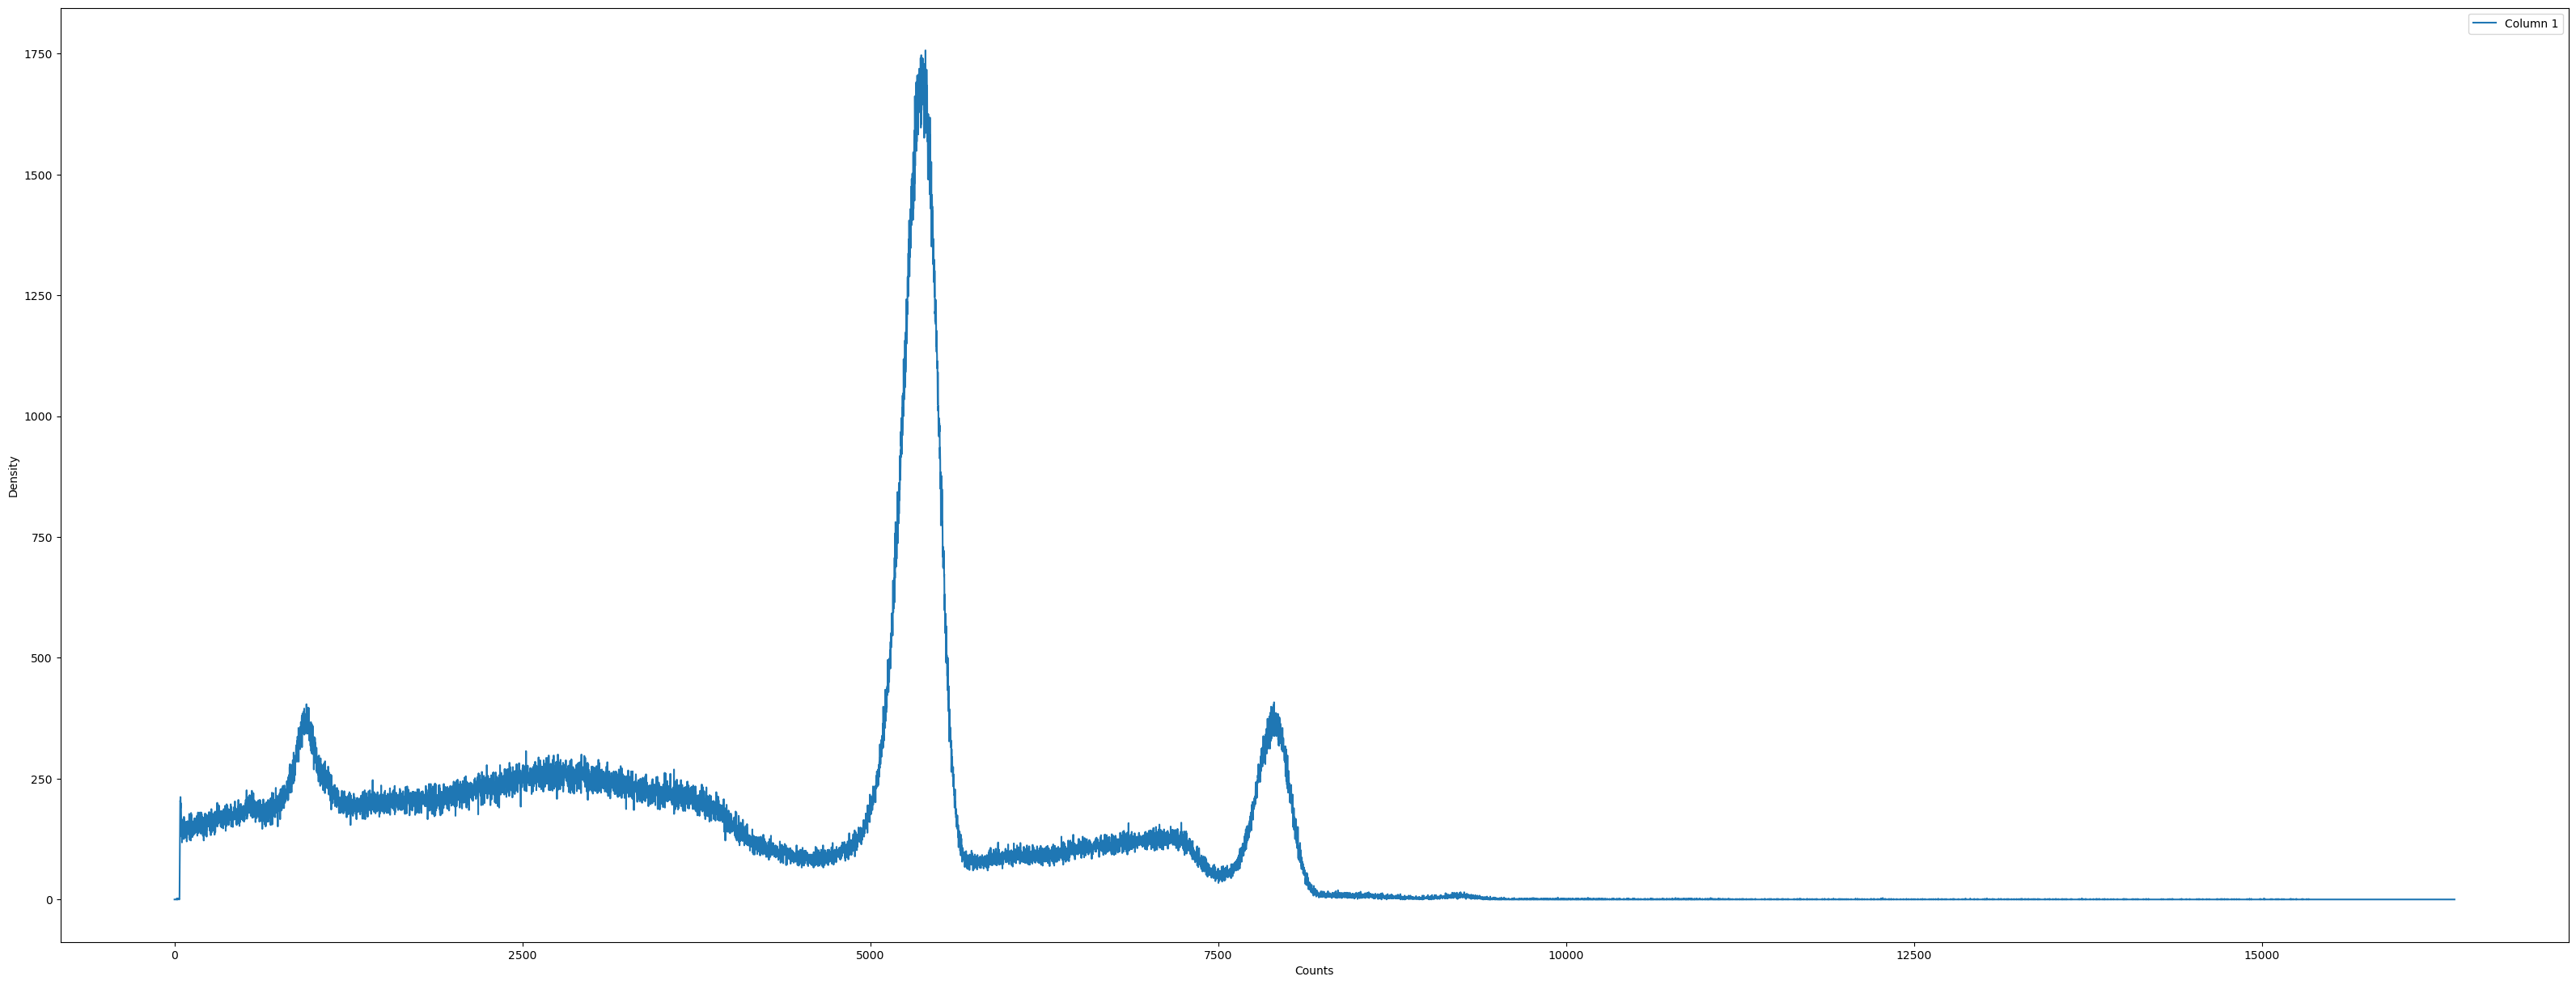

In [25]:
plt.figure(figsize=(40,15))
plt.plot(data['Count'], label='Column 1' ) 

  
plt.legend(loc='upper right') 
plt.xlabel('Counts') 
plt.ylabel('Density')

In [19]:
# Constants
c = 299792458  # speed of light in m/s
m_e = 511  # rest mass of electron in keV/c²

# Energies of the photopeaks for Na-22
E_gamma_511 = 511  # in keV, from positron annihilation
E_gamma_1274 = 1274  # in keV, from nuclear transition

# Function to calculate T_max, the maximum kinetic energy transferable in Compton scattering
def calculate_t_max(E_gamma):
    return (2 * E_gamma ** 2) / (m_e + 2 * E_gamma)

# Calculate T_max for each photopeak
T_max_511 = calculate_t_max(E_gamma_511)
T_max_1274 = calculate_t_max(E_gamma_1274)

# Calculate the Compton edge energy for each photopeak
Compton_edge_511 = E_gamma_511 - T_max_511
Compton_edge_1274 = E_gamma_1274 - T_max_1274

Compton_edge_511, Compton_edge_1274


(170.33333333333331, 212.81922196796336)